<center> <span style="color:indigo">Machine Learning e Inferencia Bayesiana</span> </center> 

<div style="text-align: center;">
<img src="../Imagenes/CUGDL_logo.png" alt="Drawing" style="width: 800px;"/>
</div>

<center> <span style="color:DarkBlue">  Tema 1. Introducción a Machine Learning </span>  </center>
<center> <span style="color:Blue"> Profesor: M. en C. Iván A. Toledano Juárez </span>  </center>

# Introducción a Machine Learning con Scikit-learn

Existen varias librerías de Python en incluso otros lenguajes de programación que proveen de implementaciones sólidas de un rango amplio de algoritmos de Machine Learning. En Python, una de las librerías más conocidas y utilizadas en este ámbito es [Scikit-learn](http://scikit-learn.org/), que nos proporciona de un número de algoritmos comunes. Este paquete está caracterizada por una API(Application Programming Interface) limpia y uniforme, así como de una buena y amplia documentación online. Un beneficio de esta uniformidad es que cuando uno ya entiende la estructura y la sintaxis básica de este paquete para un modelo, hacer un cambio a un nuevo modelo es bastante sencillo.

Este notebook veremos una visión general de la API de Scikit-Learn. Entender bien esta estructura te dará una base sólida para poder profundizar más adelante en los algoritmos y técnicas de machine learning en los siguientes temas del curso.

#### Bibliografía

* Vanderplas, J. T., & VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O’Reilly Media

## Representación de datos

El aprendizaje automático consiste, en esencia, en **construir modelos a partir de datos**. Por eso, el primer paso es entender cómo se representa la información con la que vamos a trabajar. En el contexto de Scikit-Learn, una de las formas más claras de pensar los datos es como si estuviéramos trabajando con **tablas**.

Una tabla básica puede pensarse como una **matriz bidimensional**, donde,

* Cada **fila** representa una observación o instancia del conjunto de datos (por ejemplo, una persona, una flor, un paciente, etc.)
* Cada **columna** representa una característica o variable que describe algún aspecto medible de esas observaciones (como la altura, color, temperatura, etc.)

Un ejemplo clásico es el conjunto de datos de [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set), analizado originalmente por Ronald Fisher en 1936. Como ejemplo, podemos visualizar este dataset fácilmente en forma de un ``DataFrame``de [Pandas](https://pandas.pydata.org/), utilizando la librería [Seaborn](http://seaborn.pydata.org/), y visualizar sus primeras filas para familiarizarnos con su estructura.

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Matriz de características y vector objetivo

En nuestro conjunto de datos, **cada fila representa una observación individual**, como una flor en el caso del dataset de Iris. El número total de filas corresponde al **número total de muestras** (`n_samples`) que tenemos.  

Por otro lado, **cada columna representa una característica o variable** que describe algún aspecto medible de cada muestra. En general, nos referiremos a las filas de la matriz como **muestras (samples)** y a las columnas como **características (features)**, mientras que el número total de columnas será `n_features`.

---

### La matriz de características (Features Matrix)

Podemos imaginar nuestros datos como una **matriz numérica bidimensional**, en donde:

- Cada fila (`n_samples`) es una muestra u observación individual.
- Cada columna (`n_features`) es una característica cuantitativa que describe a las muestras.

Por convención, esta matriz suele almacenarse en una variable llamada **`X`**, y tiene una forma `[n_samples, n_features]`.  
Generalmente se maneja en forma de un **arreglo NumPy** o un **DataFrame de Pandas**, aunque algunos modelos de Scikit-Learn también aceptan **matrices dispersas de SciPy**.

Las **muestras (filas)** pueden representar cualquier entidad de la que podamos obtener mediciones: una flor, una persona, un documento, una imagen, un archivo de audio, un video o incluso un objeto astronómico.  

Las **características (columnas)** son los datos que describen esas entidades de manera cuantitativa. Suelen ser valores reales, pero también pueden ser valores booleanos o categóricos discretos en ciertos casos.

---

### El vector objetivo (Target Array)

Además de la matriz de características `X`, normalmente trabajamos con un **vector objetivo o de etiquetas**, al que por convención llamaremos **`y`**. Este vector suele ser unidimensional, de longitud `n_samples`, y generalmente se almacena en un arreglo NumPy o una Serie de Pandas.  

Los valores en `y` pueden ser **numéricos continuos** (en problemas de regresión) o **clases discretas/etiquetas** (en problemas de clasificación).  
Aunque algunos estimadores de Scikit-Learn permiten manejar múltiples valores objetivo (es decir, un arreglo bidimensional `[n_samples, n_targets]`), en la mayoría de los casos trabajaremos con el caso más común: un vector objetivo unidimensional.

Un **punto de confusión frecuente** es cómo distinguir el vector objetivo de las columnas de características.  
La diferencia esencial es que el **vector objetivo representa la variable que queremos predecir** a partir de las características.  
En términos estadísticos, es la **variable dependiente**.

Por ejemplo, en el dataset de Iris, podríamos querer construir un modelo que prediga la **especie de la flor** en función de sus medidas (longitud del sépalo, ancho del pétalo, etc.).  
En este caso, la columna de "especie" sería nuestro **vector objetivo (`y`)**, mientras que las otras columnas forman nuestra **matriz de características (`X`)**.

---

A partir de esta estructura (`X` y `y`), podemos utilizar librerías como **Seaborn** para visualizar los datos de manera intuitiva y descubrir patrones en las características.


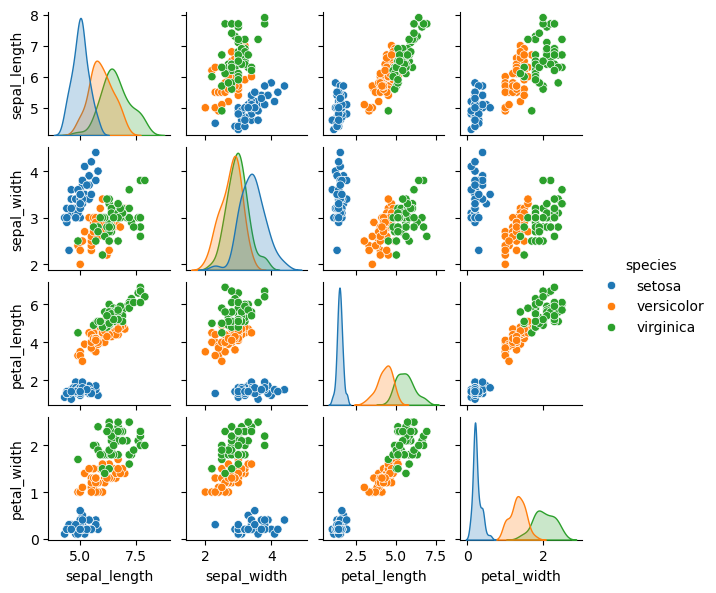

In [2]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue='species', height=1.5);

Para utilizar Scikit-Learn, vamos a extraer la matriz de características y el array objetivo de un objeto `DataFrame`, propio de la librería Pandas.

In [3]:
# Matriz de características
X_iris = iris.drop('species', axis=1)
print('Dimensiones: ', X_iris.shape)

Dimensiones:  (150, 4)


In [4]:
# Array objetivo
y_iris = iris['species']
print('Dimensiones: ', y_iris.shape)

Dimensiones:  (150,)


Ya con los datos en un formato adecuado, podemos pasar al siguiente paso.

## Estimator API

La interfaz de Scikit-Learn, conocida como **Estimator API**, fue diseñada siguiendo una serie de principios fundamentales que hacen que la biblioteca sea muy intuitiva y consistente. Estos principios están documentados en la publicación oficial sobre la [API de Scikit-Learn](http://arxiv.org/abs/1309.0238), y se resumen de la siguiente manera:

- **Consistencia:** Todos los objetos comparten una interfaz común basada en un conjunto limitado de métodos, y la documentación sigue un formato uniforme.
- **Inspección:** Todos los parámetros definidos por el usuario están disponibles como atributos públicos del modelo.
- **Jerarquía de objetos simple:** Solo los algoritmos están representados por clases en Python. Los datos se manejan con estructuras estándar como `NumPy arrays`, `DataFrames` de Pandas o matrices dispersas de SciPy, y los nombres de los parámetros son cadenas de texto comunes de Python.
- **Composición:** Muchas tareas de aprendizaje automático pueden representarse como secuencias de pasos más básicos, y Scikit-Learn permite construir estas secuencias de forma clara.
- **Valores por defecto razonables:** Cuando un modelo requiere que el usuario especifique ciertos parámetros, la biblioteca proporciona valores por defecto adecuados para facilitar el uso inicial.

En la práctica, estos principios hacen que Scikit-Learn sea muy fácil de usar una vez que comprendes los conceptos básicos.  
Cada algoritmo de aprendizaje automático en esta biblioteca sigue la misma estructura mediante la **Estimator API**, lo que proporciona una interfaz uniforme para una gran variedad de aplicaciones.

---

## Uso básico y flujo de trabajo común de Estimator API

El flujo de trabajo más común al utilizar la API de estimadores de Scikit-Learn sigue estos pasos:

1. **Elegir una clase de modelo**, importando la clase correspondiente desde Scikit-Learn.
2. **Seleccionar los hiperparámetros del modelo**, instanciando la clase con los valores deseados.
3. **Organizar los datos** en una **matriz de características `X`** y un **vector objetivo `y`**, como vimos en la sección anterior.
4. **Ajustar el modelo a los datos** utilizando el método `.fit()`.
5. **Aplicar el modelo a nuevos datos**:
   - En aprendizaje supervisado, usamos `.predict()` para obtener etiquetas de datos desconocidos.
   - En aprendizaje no supervisado, utilizamos `.transform()` o `.predict()` para descubrir estructuras o transformar los datos.

## Ejemplo de aprendizaje supervisado: regresión lineal simple

Para ilustrar este proceso, comencemos con un ejemplo muy común: la **regresión lineal simple**, es decir, ajustar una recta a un conjunto de puntos.

Utilizaremos un conjunto de datos utilizado muy comúnmente a manera de ejemplo en Ciencia de Datos, **mtcars**, que contiene datos extraídos de la revista Motor Trend US de 1974, que incluye el consumo de combustible y 10 aspectos del diseño y rendimiento de automóviles para 32 automóviles (modelos 1973-74).

In [5]:
## Importacíon de datos con Pandas
import pandas as pd
df_cars = pd.read_csv("../data/mtcars/mtcars.csv")
df_cars.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


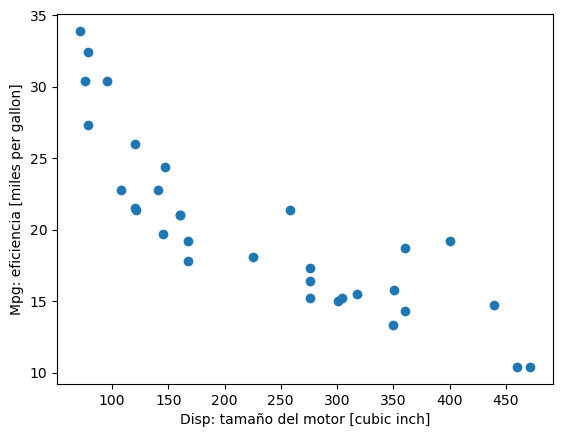

In [6]:
## Visualización de un diagrama de dispersíon con matplotlib
import matplotlib.pyplot as plt

plt.scatter(df_cars['disp'], df_cars['mpg'])
plt.xlabel('Disp: tamaño del motor [cubic inch]')
plt.ylabel('Mpg: eficiencia [miles per gallon]')
plt.show()

Con los datos en su lugar, podemos continuar aplicando la receta descrita anteriormente. Vamos paso a paso

### 1. Escoger una clase de modelo

En Scikit-Learn, **cada tipo de modelo está representado por una clase de Python**. Esto significa que, si queremos aplicar un modelo de **regresión lineal simple**, debemos comenzar por importar la clase correspondiente desde el módulo adecuado.

Por ejemplo, para construir un modelo de regresión lineal, utilizamos la clase `LinearRegression`, que se encuentra en el submódulo `sklearn.linear_model`.


In [7]:
from sklearn.linear_model import LinearRegression

Es importante hacer notar que existen más modelos lineales aparte de la regresión lineal, dentro de `sklearn.linear_model`. Para sabe más al respecto, uno puede irse a la [documentación](http://scikit-learn.org/stable/modules/linear_model.html).

### 2. Elección de los hiperparámetros del modelo

Es importante tener claro que una **clase de modelo** no es lo mismo que una **instancia del modelo**.  
La clase representa el tipo de modelo (por ejemplo, una regresión lineal), mientras que la instancia es una versión específica de ese modelo con ciertos valores definidos para sus parámetros.

Una vez que hemos elegido la clase de modelo que queremos usar, todavía hay **decisiones adicionales que debemos tomar**. Estas decisiones dependen del modelo que estemos utilizando, e incluyen preguntas como:

- ¿Queremos ajustar el offset (`y`-intercept) del modelo?
- ¿Queremos normalizar las variables predictoras?
- ¿Queremos aplicar algún tipo de preprocesamiento a las características?
- ¿Qué grado de regularización deseamos aplicar?
- ¿Cuántos componentes debe tener el modelo?

Estas decisiones se conocen como **hiperparámetros**: son parámetros que **se definen antes** de ajustar el modelo a los datos (es decir, antes de llamar a `.fit()`).

En Scikit-Learn, los hiperparámetros se configuran en el momento en que instanciamos el modelo, es decir, cuando creamos el objeto con la clase correspondiente.

Más adelante, aprenderemos cómo elegir estos hiperparámetros de manera **cuantitativa**, utilizando herramientas como la validación cruzada, en el tema de **Validación de modelos e hiperparámetros**.

En el caso de un objeto `LinearRegression`, uno de los hiperparámetros disponibles es `fit_intercept`, que nos permite decidir si queremos que el modelo ajuste automáticamente el valor del intercepto.

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Es importante tener presente que **al instanciar el modelo, lo único que ocurre es que se almacenan los valores de los hiperparámetros**.  
En otras palabras, **todavía no hemos aplicado el modelo a ningún conjunto de datos**.  
La API de Scikit-Learn hace una distinción muy clara entre dos etapas distintas:

- La **elección y configuración del modelo**
- La **aplicación del modelo a los datos**

---

### 3. Preparación de los datos: matriz de características y vector objetivo

Como vimos anteriormente, Scikit-Learn trabaja con una representación de datos específica:

- Una **matriz de características** de dos dimensiones (`X`) con forma `[n_samples, n_features]`
- Un **vector objetivo** unidimensional (`y`) de longitud `n_samples`

En nuestro caso, ya contamos con la variable `y` en el formato adecuado.  
Sin embargo, es necesario asegurarnos de que `x` también tenga la estructura correcta, es decir, que se trate de una matriz con las dimensiones requeridas.

En este ejemplo particular, eso implica simplemente **reformatear un arreglo unidimensional para convertirlo en una matriz de una sola columna**, es decir, con una forma explícita de `[n_samples, 1]`.

Este paso es importante porque algunos algoritmos de Scikit-Learn requieren que las entradas estén en formato matricial, incluso si solo se está utilizando una única variable predictora.


In [9]:
# Guardamos estos datos en sus matrices y arreglos correspondientes
X_cars = df_cars['disp'].to_frame() # Nos aseguramos que la matriz de características sea realmente una matriz (o un dataframe en este caso)
y_cars = df_cars['mpg']

### 4. Ajustar (fit) el modelo a los datos

Ahora es momento de ajustar nuestro modelo propuesto a nuestros datos. Esto puede realizarse con el método `fit` dentro de la instancia creada del modelo.

In [10]:
model.fit(X_cars, y_cars)

LinearRegression()

Cuando aplicamos el método `fit`, se realizan internamente una serie de **cálculos específicos del modelo**, dependiendo del tipo de algoritmo que estemos utilizando.  

Scikit-Learn se encarga de llevar a cabo estos cálculos y guarda los resultados como **atributos internos del modelo**. Estos atributos permiten inspeccionar lo que el modelo ha aprendido del conjunto de datos.

Por convención, **todos los parámetros aprendidos durante el proceso de ajuste llevan un guion bajo al final de su nombre** (`_`). Esto los distingue claramente de los hiperparámetros definidos antes del ajuste.

Por ejemplo, en un modelo de regresión lineal simple, algunos de los atributos aprendidos típicos son:

- Los coeficientes del modelo (pendientes asociadas a cada característica)
- El término independiente o intercepto (si se ajustó)

Estos atributos pueden consultarse después de ajustar el modelo y son útiles tanto para interpretar los resultados como para realizar análisis más profundos.


In [11]:
model.coef_

array([-0.04121512])

In [12]:
model.intercept_

np.float64(29.599854756163946)

En este caso, estos coeficientes están asociados a la ecuación de una recta,

\begin{equation}
y = \beta_0 + \beta_1 x
\end{equation}

donde $\beta_0$ es la ordenada al origen o intersección con el eje y (es decir, el `intercept_`), y $\beta_1$ es la pendiente o cambio asociado a la variable $x$ (en este caso `coef_`). Si fueran varias variables predictoras, `coef_` incluiría varios coeficientes, cada uno asociado a una de las variables predictoras, por ejemplo. 

Con esta información, en el caso de una regresión lineal simple, podríamos visualizar nuestra recta ajustada a los datos.

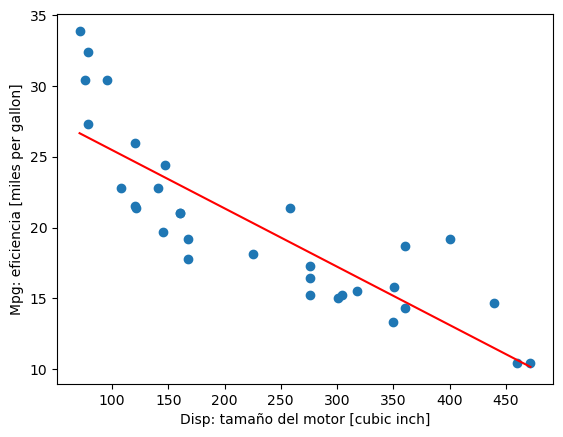

In [13]:
import numpy as np

# función de una recta
def line(x,beta_0, beta_1):
    return beta_0 + beta_1 * x

# Extrae x y ordena
x_sorted = np.sort(df_cars['disp'].to_numpy())
# Aplica tu función personalizada de recta
y_line = line(x_sorted, model.intercept_, model.coef_)

plt.scatter(df_cars['disp'], df_cars['mpg'])
plt.plot(x_sorted, y_line, color = 'red') # aplicamos nuestra función de la recta con sus coeficientes
plt.xlabel('Disp: tamaño del motor [cubic inch]')
plt.ylabel('Mpg: eficiencia [miles per gallon]')
plt.show()

**NOTA IMPORTANTE**: ¿Qué pasa con la incertidumbre en los parámetros del modelo? ¿Podemos conocerla?

En general, **Scikit-Learn no está diseñado para interpretar los parámetros internos del modelo**, como lo haríamos en un enfoque estadístico tradicional. Su enfoque principal está en el **rendimiento del modelo en la predicción**, no en la inferencia o interpretación de los coeficientes.

La interpretación de parámetros (por ejemplo, saber cuán significativa es una variable, o qué tan confiables son los coeficientes estimados) pertenece más al campo de la **modelación estadística**, no tanto al aprendizaje automático.

Si te interesa analizar con mayor profundidad el **significado e incertidumbre de los parámetros ajustados**, existen herramientas especializadas para ello, como la biblioteca **`statsmodels`** ([https://www.statsmodels.org](https://www.statsmodels.org)) en Python. Esta permite realizar análisis estadísticos más clásicos, como modelos lineales con intervalos de confianza, pruebas de hipótesis y significancia de variables.

En resumen:

- **Scikit-Learn**: se centra en la predicción y el rendimiento general del modelo.
- **Statsmodels**: se enfoca en la interpretación estadística de los modelos y sus parámetros.

Ambos enfoques son valiosos, y cada uno es útil dependiendo del tipo de pregunta que quieras responder.

### 5. Predicción de nuevos datos

Una vez que el modelo ha sido entrenado, la tarea principal del **aprendizaje supervisado** es evaluar qué tan bien puede **predecir resultados sobre datos nuevos**, es decir, sobre ejemplos que no formaron parte del conjunto de entrenamiento.

En Scikit-Learn, esta predicción se realiza mediante el método `predict`. Este método aplica el modelo ajustado a nuevos valores de entrada (`X`) y devuelve las predicciones correspondientes de salida (`y`).

En este ejemplo, consideraremos como "nuevos datos" una serie de valores distribuidos a lo largo del eje `x`. Luego le pediremos al modelo que nos indique qué valores de `y` predice para esos puntos.

Este proceso nos permite **visualizar la línea ajustada** anterior por el modelo y también analizar su comportamiento al extrapolar o interpolar fuera del conjunto original de entrenamiento.

Más adelante, aprenderemos también a evaluar cuantitativamente la calidad de estas predicciones usando distintas métricas de error.


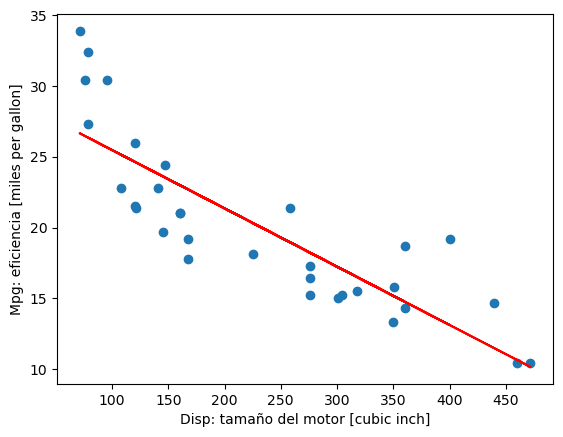

In [14]:
X_cars = df_cars['disp'].to_frame() # Nos aseguramos que la matriz de características sea realmente una matriz (o un dataframe en este caso)
y_cars = df_cars['mpg']
y_pred = model.predict(X_cars) # valores predichos por nuestro modelo entrenado
# notar que aquí no utilizamos explícitamente una ecuación, scikit-learn está haciendo las predicciones por nosotros

plt.scatter(df_cars['disp'], df_cars['mpg'])
plt.plot(df_cars['disp'], y_pred, color = 'red') # aplicamos nuestra función de la recta con sus coeficientes
plt.xlabel('Disp: tamaño del motor [cubic inch]')
plt.ylabel('Mpg: eficiencia [miles per gallon]')
plt.show()

## Ejemplo de aprendizaje supervisado: clasificación del conjunto Iris

Veamos ahora otro ejemplo de aplicación del flujo de trabajo de aprendizaje automático, esta vez usando nuevamente el conjunto de datos **Iris** que exploramos anteriormente.

La pregunta que nos planteamos es la siguiente:  
**¿Qué tan bien puede un modelo entrenado con una parte del conjunto de datos predecir las etiquetas del resto de los datos?**

Para esta tarea utilizaremos un modelo generativo sencillo llamado **Naive Bayes Gaussiano**. Este modelo asume que los datos de cada clase provienen de una distribución normal (gaussiana) alineada con los ejes de las variables.

Aunque esta es una suposición bastante fuerte y simplificada, el modelo tiene varias ventajas:

- Es **muy rápido** de entrenar.
- **No requiere ajuste de hiperparámetros**.
- Es ideal como **modelo base o de referencia inicial**, antes de evaluar si modelos más complejos ofrecen mejoras significativas.

Como queremos evaluar al modelo con datos que **no ha visto previamente**, dividiremos nuestro conjunto original en dos partes:

- Un **conjunto de entrenamiento**, con el que se ajusta el modelo.
- Un **conjunto de prueba**, con el que se evalúa el rendimiento del modelo.

Esta división se puede hacer manualmente, pero es mucho más práctico utilizar la función `train_test_split` que ofrece Scikit-Learn.


In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [16]:
from sklearn.naive_bayes import GaussianNB # 1. escogemos la clase del modelo
model = GaussianNB()                       # 2. instanciamos el modelo, junto con sus hiperparámetros (en este caso ninguno)
model.fit(Xtrain, ytrain)                  # 3. ajustamos el modelo a los datos proporcionados (entrenamiento)
y_model = model.predict(Xtest)             # 4. hacemos predicciones con datos nuevos, y evaluamos

Utilizamos uno de los métodos de Scikit-Learn, `accuracy_score` para ver la fracción de las etiquetas predichas que realmente coinciden con las etiquetas reales (es, decir, qué tanto le atinamos).

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Vemos que tenemos una gran precisión de 97%, y que incluso este modelo de NaiveBayes es efectivo para hacer predicciones sobre este dataset.

## Ejemplo de aprendizaje no supervisado: reducción de dimensionalidad con Iris

Como ejemplo de un problema de **aprendizaje no supervisado**, vamos a explorar una técnica para **reducir la dimensionalidad** del conjunto de datos Iris con el fin de facilitar su visualización.

Recordemos que el dataset de Iris es **cuatridimensional**, ya que cada muestra (es decir, cada flor) está descrita por cuatro características numéricas.

La tarea de **reducción de dimensionalidad** consiste en buscar si existe una representación de menor dimensión (por ejemplo, en dos dimensiones) que conserve la mayor parte de la estructura o información esencial del conjunto original.

Este tipo de técnicas se usa con frecuencia como apoyo para la **visualización de datos**, ya que graficar en dos dimensiones es mucho más intuitivo y útil que hacerlo en espacios de cuatro dimensiones o más.

---

### ¿Qué técnica vamos a utilizar?

En este ejemplo aplicaremos **Análisis de Componentes Principales (PCA)**, una técnica lineal y rápida para reducir dimensiones. PCA busca encontrar nuevas direcciones (componentes principales) en las que los datos varían más, y proyecta los datos sobre esas direcciones.

Le pediremos al modelo que nos devuelva **dos componentes principales**, es decir, una representación **bidimensional** del conjunto de datos Iris.

---

A continuación, seguiremos el mismo flujo de trabajo que hemos utilizado antes:

1. Importar la clase del modelo (en este caso, `PCA`)
2. Instanciar el modelo con los hiperparámetros deseados (por ejemplo, `n_components=2`)
3. Organizar los datos de entrada (`X`)
4. Ajustar el modelo a los datos con `.fit()`
5. Aplicar la transformación con `.transform()` para obtener la nueva representación de los datos
6. Visualizar los resultados


In [18]:
from sklearn.decomposition import PCA  # 1. Escogemos la clase de modelo a utilizar (en este caso PCA)
model = PCA(n_components=2)            # 2. Instanciamos el modelo, junto son sus hiperparámetros
model.fit(X_iris)                      # 3. Ajustamos el modelo a los datos ("entrenamiento")
X_2D = model.transform(X_iris)         # 4. Transformamos los datos. En este caso trabajamos con etiquetas, aquí entra otra etapa con transform


Ahora graficamos los resultados. En este caso, utilizamos la paquetería seaborn, que se lleva bien con la paquetería Pandas y sus objetos.

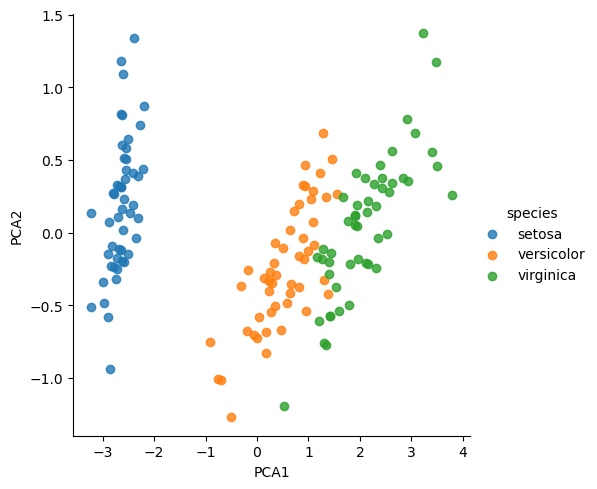

In [19]:
import seaborn as sns

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

Una vez que proyectamos los datos del conjunto Iris a dos dimensiones usando PCA, observamos que **las distintas especies de flores quedan bastante bien separadas**, a pesar de que el algoritmo **no tenía conocimiento previo de las etiquetas de especie**.

Esto nos sugiere que probablemente un **modelo de clasificación sencillo podría funcionar bien** en este conjunto de datos, ya que las clases parecen tener una separación natural en el espacio de características.

---

## Ejemplo de aprendizaje no supervisado: agrupamiento con Iris

Ahora vamos a aplicar una técnica diferente de aprendizaje no supervisado sobre el mismo conjunto de datos: el **agrupamiento** (*clustering*).

A diferencia de la clasificación supervisada, un algoritmo de clustering **intenta descubrir estructuras o grupos dentro de los datos sin utilizar etiquetas conocidas**. Es decir, su objetivo es identificar subconjuntos de muestras que sean similares entre sí, basándose únicamente en sus características.

En este ejemplo utilizaremos un método potente y flexible conocido como **modelo de mezcla gaussiana** (*Gaussian Mixture Model*, o GMM). Este enfoque modela los datos como una combinación de varias "nubes" gaussianas, y permite capturar agrupamientos que no necesariamente tienen formas circulares o simétricas.

Más adelante abordaremos este método con más profundidad. Por ahora, nos enfocaremos en aplicarlo siguiendo el mismo flujo de trabajo que ya conocemos:

1. Importar la clase correspondiente para el modelo de mezcla gaussiana
2. Instanciar el modelo con los hiperparámetros deseados (por ejemplo, el número de grupos)
3. Ajustar el modelo a los datos con `.fit()`
4. Obtener las asignaciones de grupo para cada muestra usando `.predict()`
5. Visualizar los resultados de la agrupación y compararlos con las verdaderas especies (aunque estas no se usan durante el entrenamiento)


In [20]:
from sklearn.mixture import GaussianMixture      # 1. Escogemos la clase de modelo (Gaussian Mixture)
model = GaussianMixture(n_components=3,
                        covariance_type='full')  # 2. Instanciamos el modelo, junto con sus hiperparámetros
model.fit(X_iris)                                # 3. Ajustamos el modelo a los datos, entrenamos
y_gmm = model.predict(X_iris)                    # 4. Determinamos nuevas etiquetas

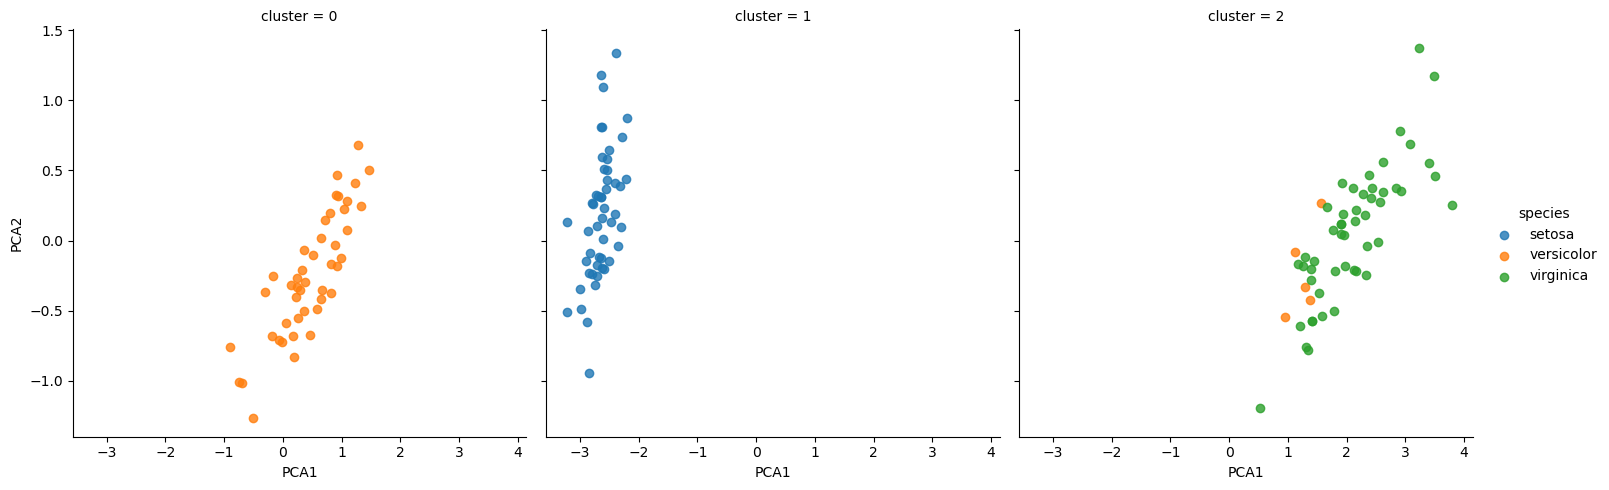

In [21]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False)

Al analizar los resultados del agrupamiento según el número de clúster asignado, podemos observar **qué tan bien el modelo GMM logró recuperar las etiquetas reales** del conjunto de datos.

En particular, vemos que la especie *setosa* queda **perfectamente separada** dentro del clúster 2. Por otro lado, hay **una leve superposición entre *versicolor* y *virginica***, lo cual es esperable, ya que esas dos especies tienen características más similares entre sí.

Este resultado es bastante revelador: incluso **sin conocer las etiquetas reales** ni contar con un experto que las proporcione, las **mediciones** de las flores son lo suficientemente distintas como para que un algoritmo sencillo de agrupamiento pueda **detectar automáticamente la presencia de diferentes grupos** dentro del conjunto de datos.

Este tipo de análisis no supervisado puede ser muy útil en contextos donde no se dispone de etiquetas, y puede servir también como **herramienta exploratoria** que oriente a expertos en la interpretación de patrones o relaciones entre muestras observadas.


## Aplicación: explorando dígitos escritos a mano

Para ilustrar estos principios con un problema más interesante, vamos a trabajar con una parte del problema clásico de **reconocimiento óptico de caracteres** (OCR): la identificación de **dígitos escritos a mano**.

En un escenario real, este problema implicaría tanto **localizar** como **reconocer** caracteres dentro de una imagen.  
Aquí simplificaremos la tarea utilizando un conjunto de datos preformateado que ya viene incluido en Scikit-Learn: el dataset de **dígitos escritos a mano**.

---

## Carga y visualización del conjunto de datos

Scikit-Learn proporciona una interfaz sencilla para acceder a este conjunto de datos, lo que nos permitirá **cargarlo fácilmente** y **explorarlo visualmente**.

El conjunto contiene imágenes en escala de grises de tamaño 8x8, cada una representando un dígito entre 0 y 9, junto con la etiqueta correspondiente.  
Este dataset es ideal para practicar tanto **clasificación supervisada** como **técnicas de reducción de dimensionalidad** o **visualización en espacios más bajos**.

A continuación, procederemos a:

1. Cargar los datos desde Scikit-Learn
2. Inspeccionar la estructura de los datos (imágenes y etiquetas)
3. Visualizar algunos ejemplos de dígitos para familiarizarnos con el contenido


In [22]:
# carga de datos
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [23]:
# ejemplo de como se ve una de estas imágenes
digits.images[0] 
# se trata de un array de Numpy

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Las imágenes puedes considerarse arrays 3-dimensionales, donde una dimensión nos da el ancho, otra lo alto, y la tercera es una profundidad con información del color. En este caso tenemos 1797 muestras de imágenes en blanco y negro, cada una con un tamaño de 8 $\times$ 8 pixeles. Vamos a visualizarlas.

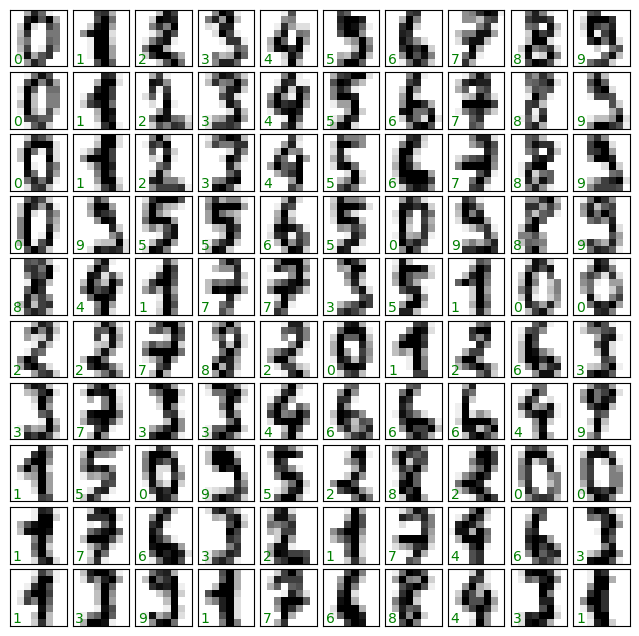

In [24]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Para poder trabajar con este conjunto de datos dentro del flujo estándar de Scikit-Learn, necesitamos representarlo en la forma habitual de la librería: una **matriz bidimensional de características** con forma `[n_samples, n_features]`.

En este caso, cada imagen es de 8×8 píxeles, lo que nos da un total de 64 píxeles por imagen.  
Entonces, lo que haremos es **tratar cada píxel como una característica**, es decir, **aplanar** cada imagen para convertirla en un arreglo unidimensional de longitud 64.

De esta manera, cada muestra (un dígito) estará representada por un vector con 64 valores, que son las intensidades de cada píxel.

Además de esta matriz de características, también necesitamos el **vector objetivo**, que contiene la **etiqueta real** correspondiente a cada imagen (es decir, el número que representa cada dígito).

En el conjunto de datos `digits` de Scikit-Learn, estas dos estructuras ya están preparadas y listas para usarse:

- `.data` contiene la matriz de características (`X`)
- `.target` contiene las etiquetas (`y`)


In [25]:
X = digits.data
X.shape

(1797, 64)

In [26]:
y = digits.target
y.shape

(1797,)

Vemos que efectivamente tenemos 64 características en $X$ (8X8 pixeles) y un vector de 1797 etiquetas en $y$

## Ejemplo de aprendizaje no supervisado: reducción de dimensionalidad

Aunque cada imagen de dígito está representada por 64 características (una por cada píxel), **visualizar datos en 64 dimensiones no es práctico**. Por eso, una estrategia común es **reducir la dimensionalidad** del conjunto de datos para poder observarlo en dos dimensiones de manera visual e intuitiva.

Para ello, usaremos un enfoque de aprendizaje no supervisado que **busca proyectar los datos en un espacio de menor dimensión**, preservando lo más posible su estructura.

En este caso, aplicaremos un algoritmo de aprendizaje de variedades (*manifold learning*) llamado **Isomap**, que nos permitirá transformar los datos del espacio original de 64 dimensiones a un nuevo espacio bidimensional.

Una vez realizada esta transformación, podremos representar los datos en una gráfica 2D para explorar si existen patrones, agrupamientos o separaciones naturales entre las distintas clases de dígitos, sin necesidad de utilizar sus etiquetas durante el proceso.


In [27]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2, n_neighbors=20)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape) # esto resulta ahora en dos características solamente

(1797, 2)


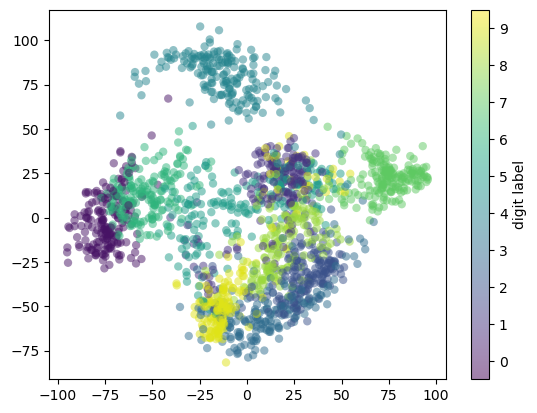

In [28]:
import matplotlib
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=matplotlib.colormaps.get_cmap('viridis'))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

### ¿Qué nos dice esta visualización?

Esta gráfica nos da una buena **intuición visual sobre qué tan bien están separados los distintos dígitos** en el espacio original de 64 dimensiones.

Por ejemplo, los ceros y unos parecen estar **bien separados**, con muy poca superposición entre ellos. Esto tiene sentido si lo pensamos: un cero suele tener un espacio vacío en el centro, mientras que un uno generalmente tiene **tinta en el centro** de la imagen.

En cambio, observamos que existe un **gradiente continuo entre unos y cuatros**. Esto también es comprensible si consideramos que algunas personas dibujan el número uno con una pequeña "cobertura" o "sombrero", lo cual puede hacer que se parezca visualmente a un cuatro.

A pesar de cierta mezcla en los bordes, en general los diferentes grupos de dígitos están **relativamente bien localizados** en el espacio de características. Esto sugiere que **incluso un clasificador supervisado simple podría funcionar razonablemente bien** sobre el conjunto de datos completo y de alta dimensionalidad.

Probemos ahora aplicar un modelo supervisado para verificarlo.

## Clasificación de dígitos

Ahora vamos a aplicar un algoritmo de clasificación a estos datos. Así como lo hicimos con los datos de Iris, agregando una separación entre datos de **entrenamiento** y datos de **prueba**

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [30]:
# Flujo típico
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Incluso con este modelo simple de NaiveBayes, conseguimos una precisión del 83% para esta clasificación de dígitos. Sin embargo, aún así tenemos que evaluar los resultados que obtuvimos. Una de las formas típicas de evaluar un problema de clasifiación es con la **matriz de confusión**,

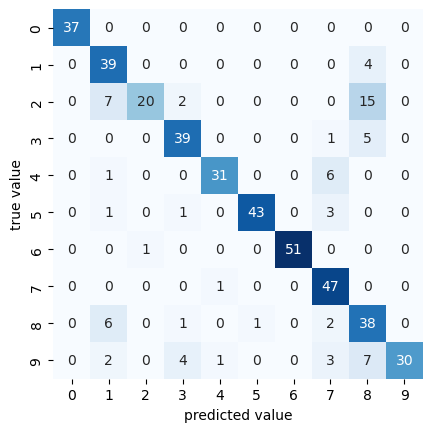

In [32]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

Este tipo de visualización nos permite identificar **dónde tienden a concentrarse los errores de clasificación** del modelo.  
Por ejemplo, podemos observar que muchos de los dígitos etiquetados como "2" han sido clasificados erróneamente como "1" u "8".

Otra forma de obtener **intuición visual sobre el comportamiento del modelo** es graficar nuevamente las entradas (por ejemplo, las imágenes de los dígitos), pero esta vez mostrando las **etiquetas predichas**.

Para facilitar la interpretación, podemos usar **verde** para las predicciones correctas y **rojo** para las incorrectas. Esto nos ayudará a detectar patrones en los errores y entender mejor las limitaciones del modelo.


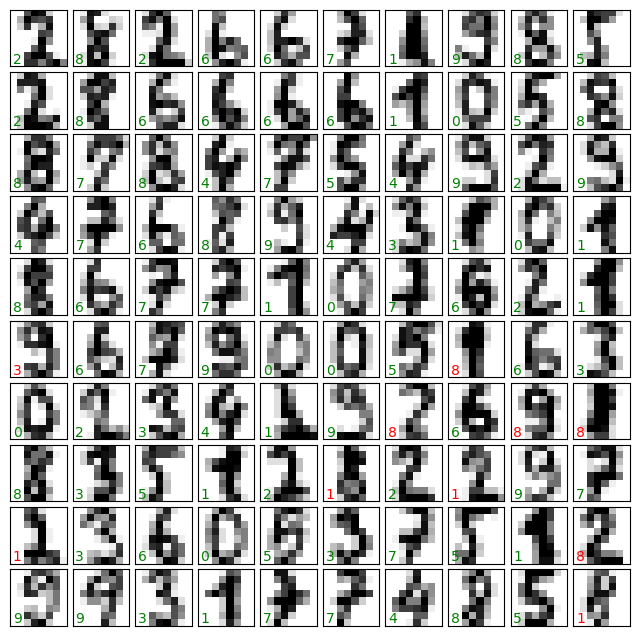

In [33]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')
plt.show()

Examinar este subconjunto de datos nos permite obtener **ideas sobre los casos donde el algoritmo no está funcionando de manera óptima**.  
Por ejemplo, al observar visualmente los errores, podemos identificar patrones de confusión entre clases específicas.

Para mejorar más allá de una tasa de acierto del **83%**, podríamos optar por un **algoritmo más sofisticado**, como:

- **Máquinas de vectores de soporte** (SVM), que funcionan muy bien en espacios de alta dimensión.
- **Bosques aleatorios** (*Random Forests*), que combinan múltiples árboles de decisión para mejorar la generalización.
- O bien, explorar otras estrategias de clasificación más avanzadas.

---

## Resumen

En este capítulo cubrimos los elementos esenciales de la representación de datos en Scikit-Learn y su interfaz Estimator API.

Independientemente del modelo que se utilice, el patrón de trabajo general se mantiene:

1. **Importar** el estimador adecuado.
2. **Instanciar** el modelo, indicando parámetros si es necesario.
3. **Ajustar** el modelo con los datos de entrenamiento.
4. **Predecir** o transformar nuevos datos con el modelo entrenado.

Con este conocimiento, ya estás listo para **explorar la documentación de Scikit-Learn** y comenzar a experimentar con distintos modelos sobre tus propios conjuntos de datos.

Esta ha sido una **primera aproximación al aprendizaje automático**, cuyo propósito es mostrarte el potencial de los algoritmos para realizar predicciones a partir de los datos que les proporcionamos.

A lo largo del curso, analizaremos en detalle el funcionamiento de los algoritmos más comunes de Machine Learning. Sin embargo, como habrás notado, **es esencial contar con una base sólida en estadística, cálculo y álgebra lineal**, ya que estos fundamentos matemáticos son los que permiten entender, ajustar e interpretar los modelos correctamente.

Por ello, **antes de avanzar al estudio detallado de cada modelo**, dedicaremos las siguientes secciones a repasar conceptos clave de **estadística descriptiva y probabilidad**, que nos servirán como base para los temas más avanzados del curso.